In [60]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.svm import SVC     ### SVM for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

import random
import numpy as np
import math
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

In [27]:
df = pd.read_csv('data/heart.csv', header = 0) 
#     r,c = df.shape
# df.columns.values[0] = "target"

In [28]:
Y = df[['target']]
X = df.iloc[:,df.columns !='target']

In [29]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,  stratify=Y, train_size=0.7)        
r,c = df.shape


In [30]:
rf_model = RandomForestClassifier(n_estimators=1, max_features= int(math.sqrt(c))+1)
rf_model.fit(X_Train,Y_Train.values.ravel())
pred_y = rf_model.predict(X_Test)

In [31]:
accRF = metrics.accuracy_score(Y_Test, pred_y)


In [32]:
print(accRF)

0.935064935064935


In [33]:
def draw_tree(inp_tree
              , out_file = None
              , filled=True
              , rounded=True
              , special_characters=True):
    dot_data = tree.export_graphviz(inp_tree
                                    , out_file = out_file
                                    , filled   = filled
                                    , rounded  = rounded
                                    , special_characters = special_characters)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    img = Image(graph.create_png())
    display(img)

/Users/kieuanh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


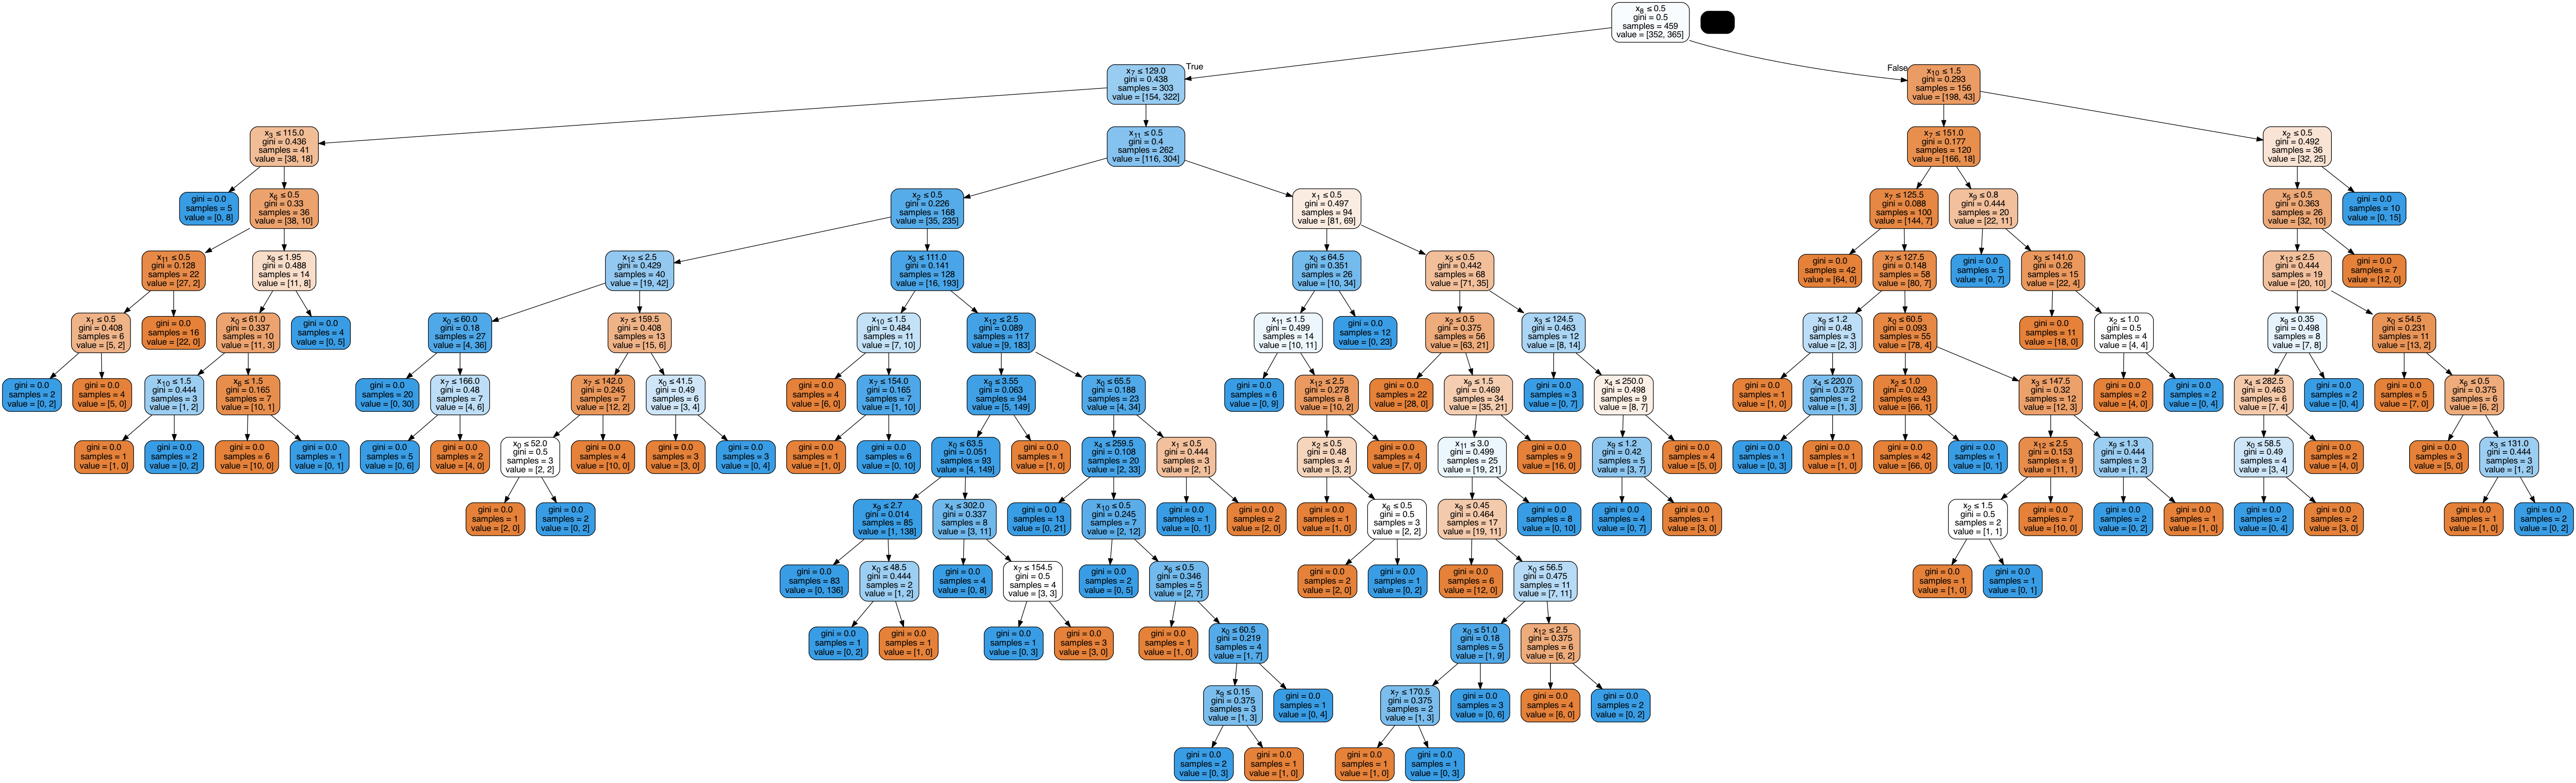

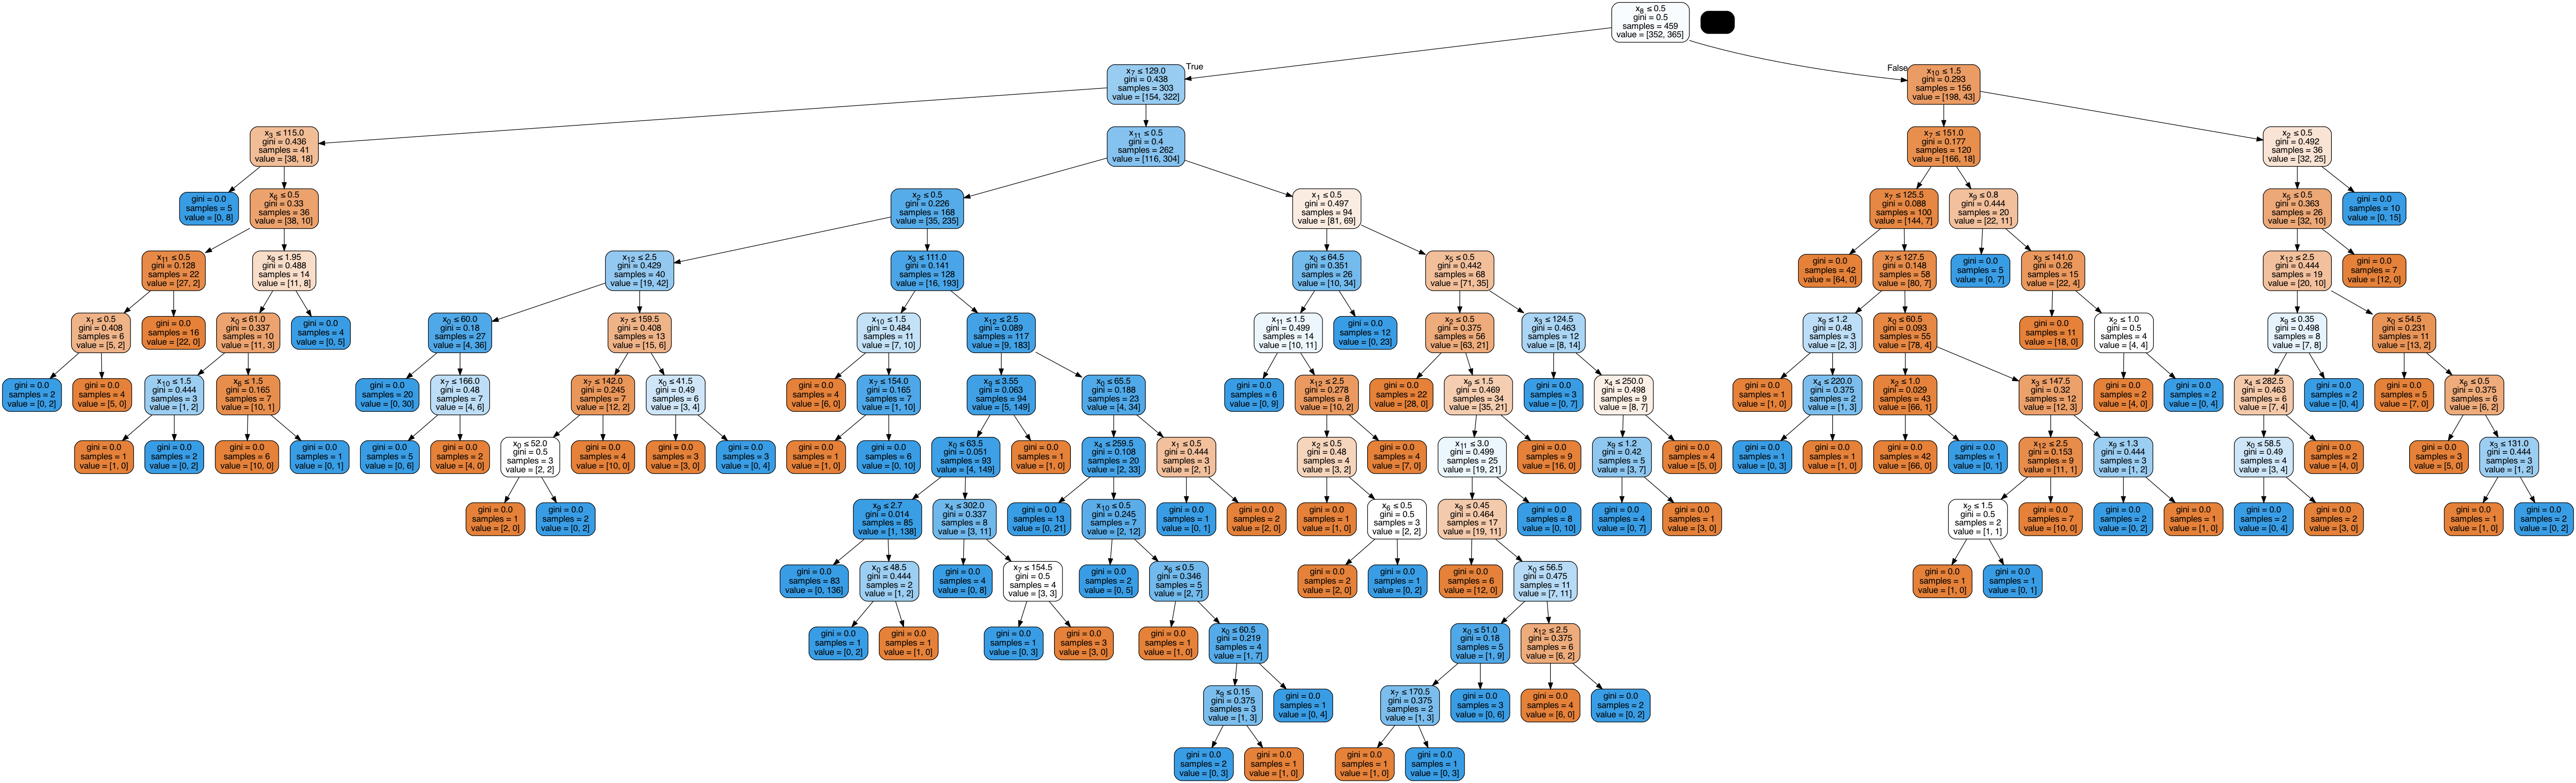

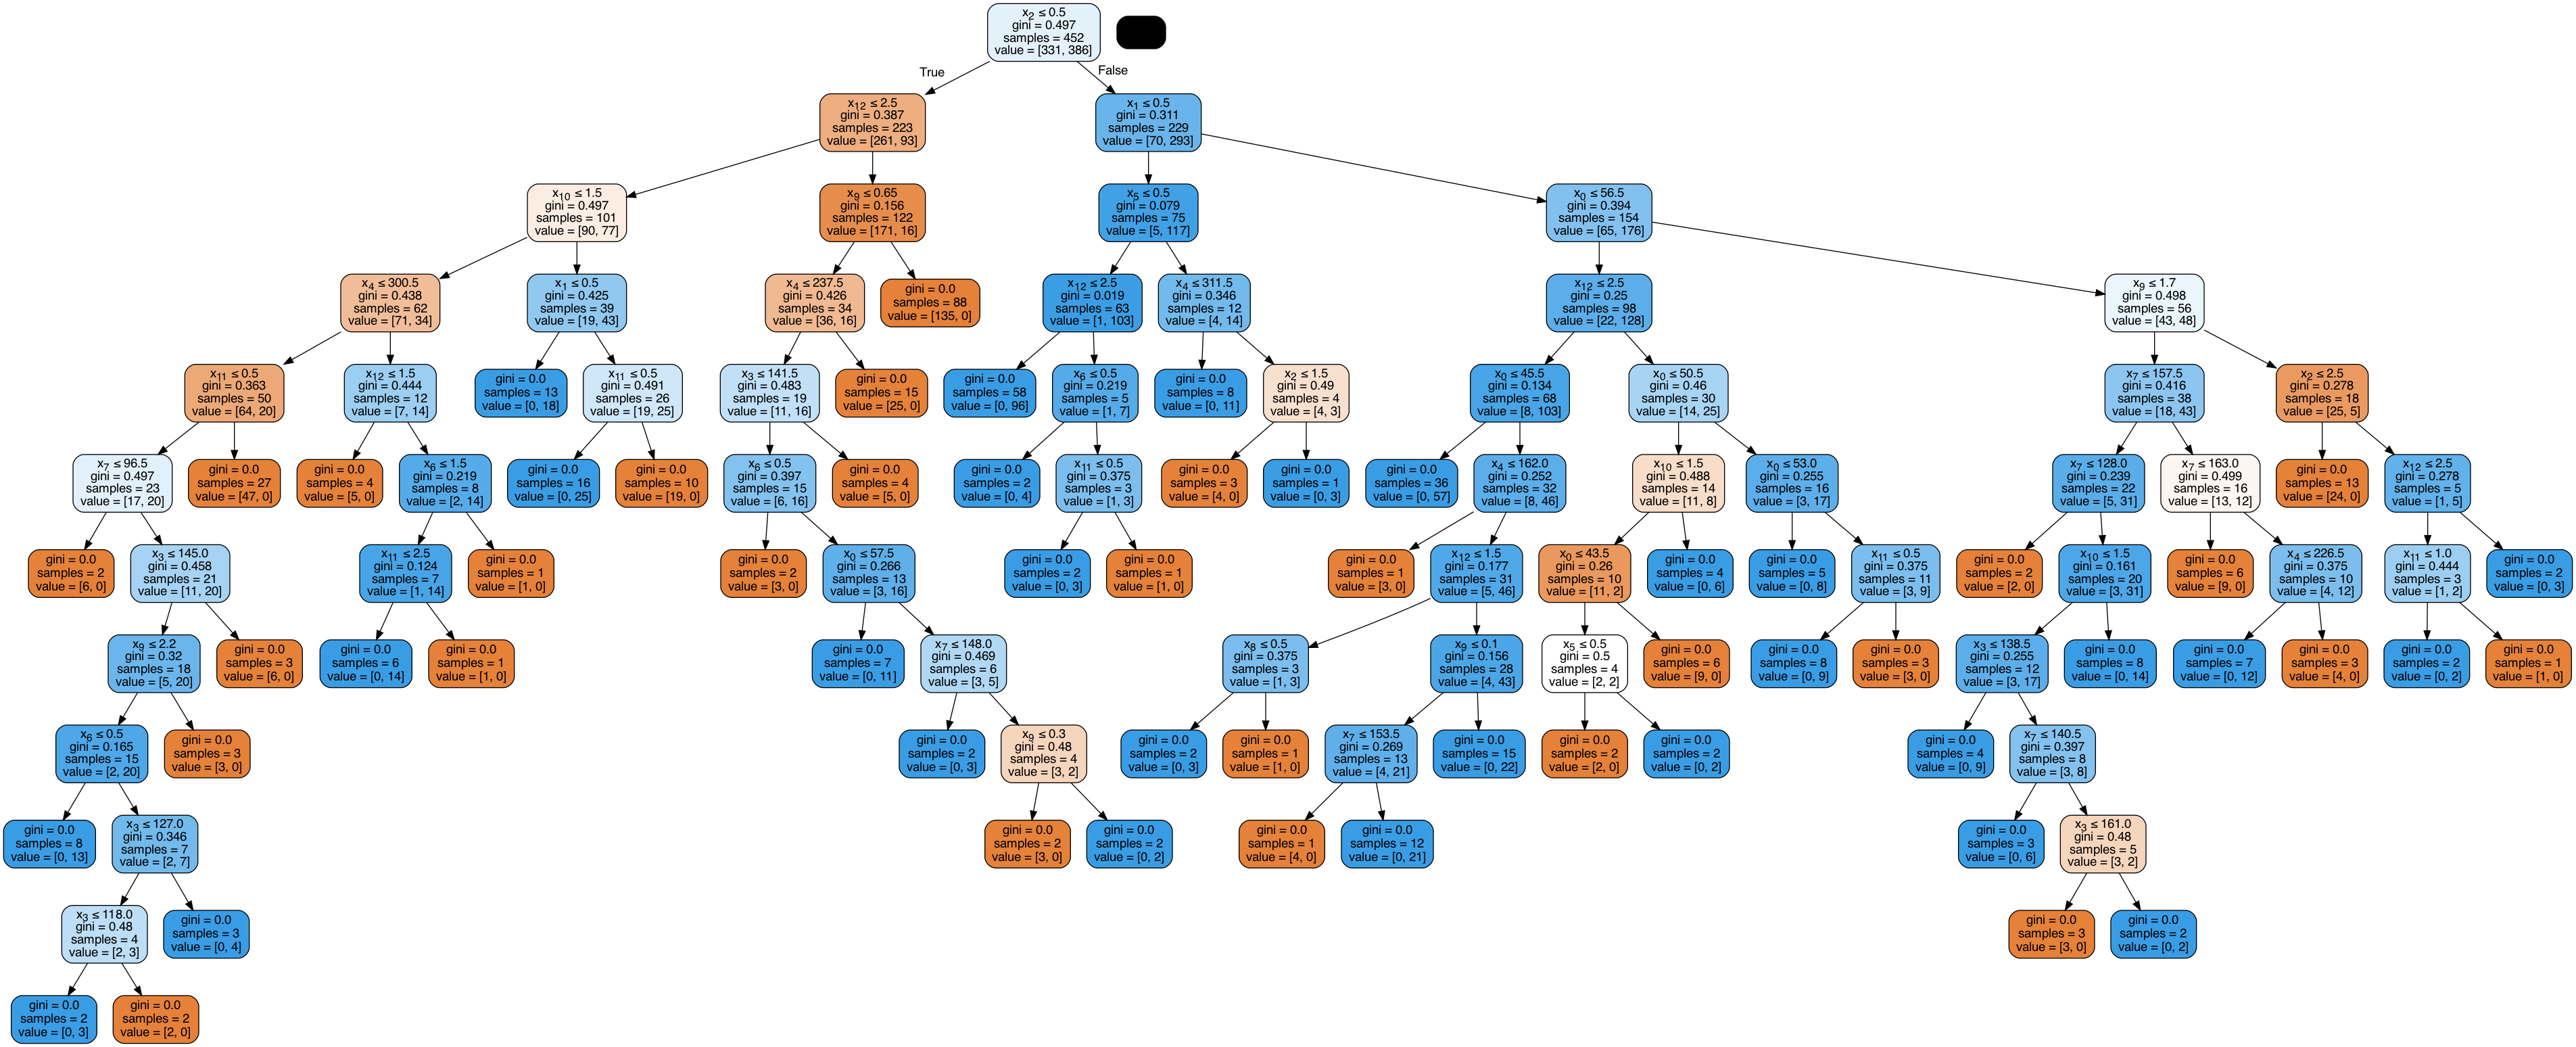

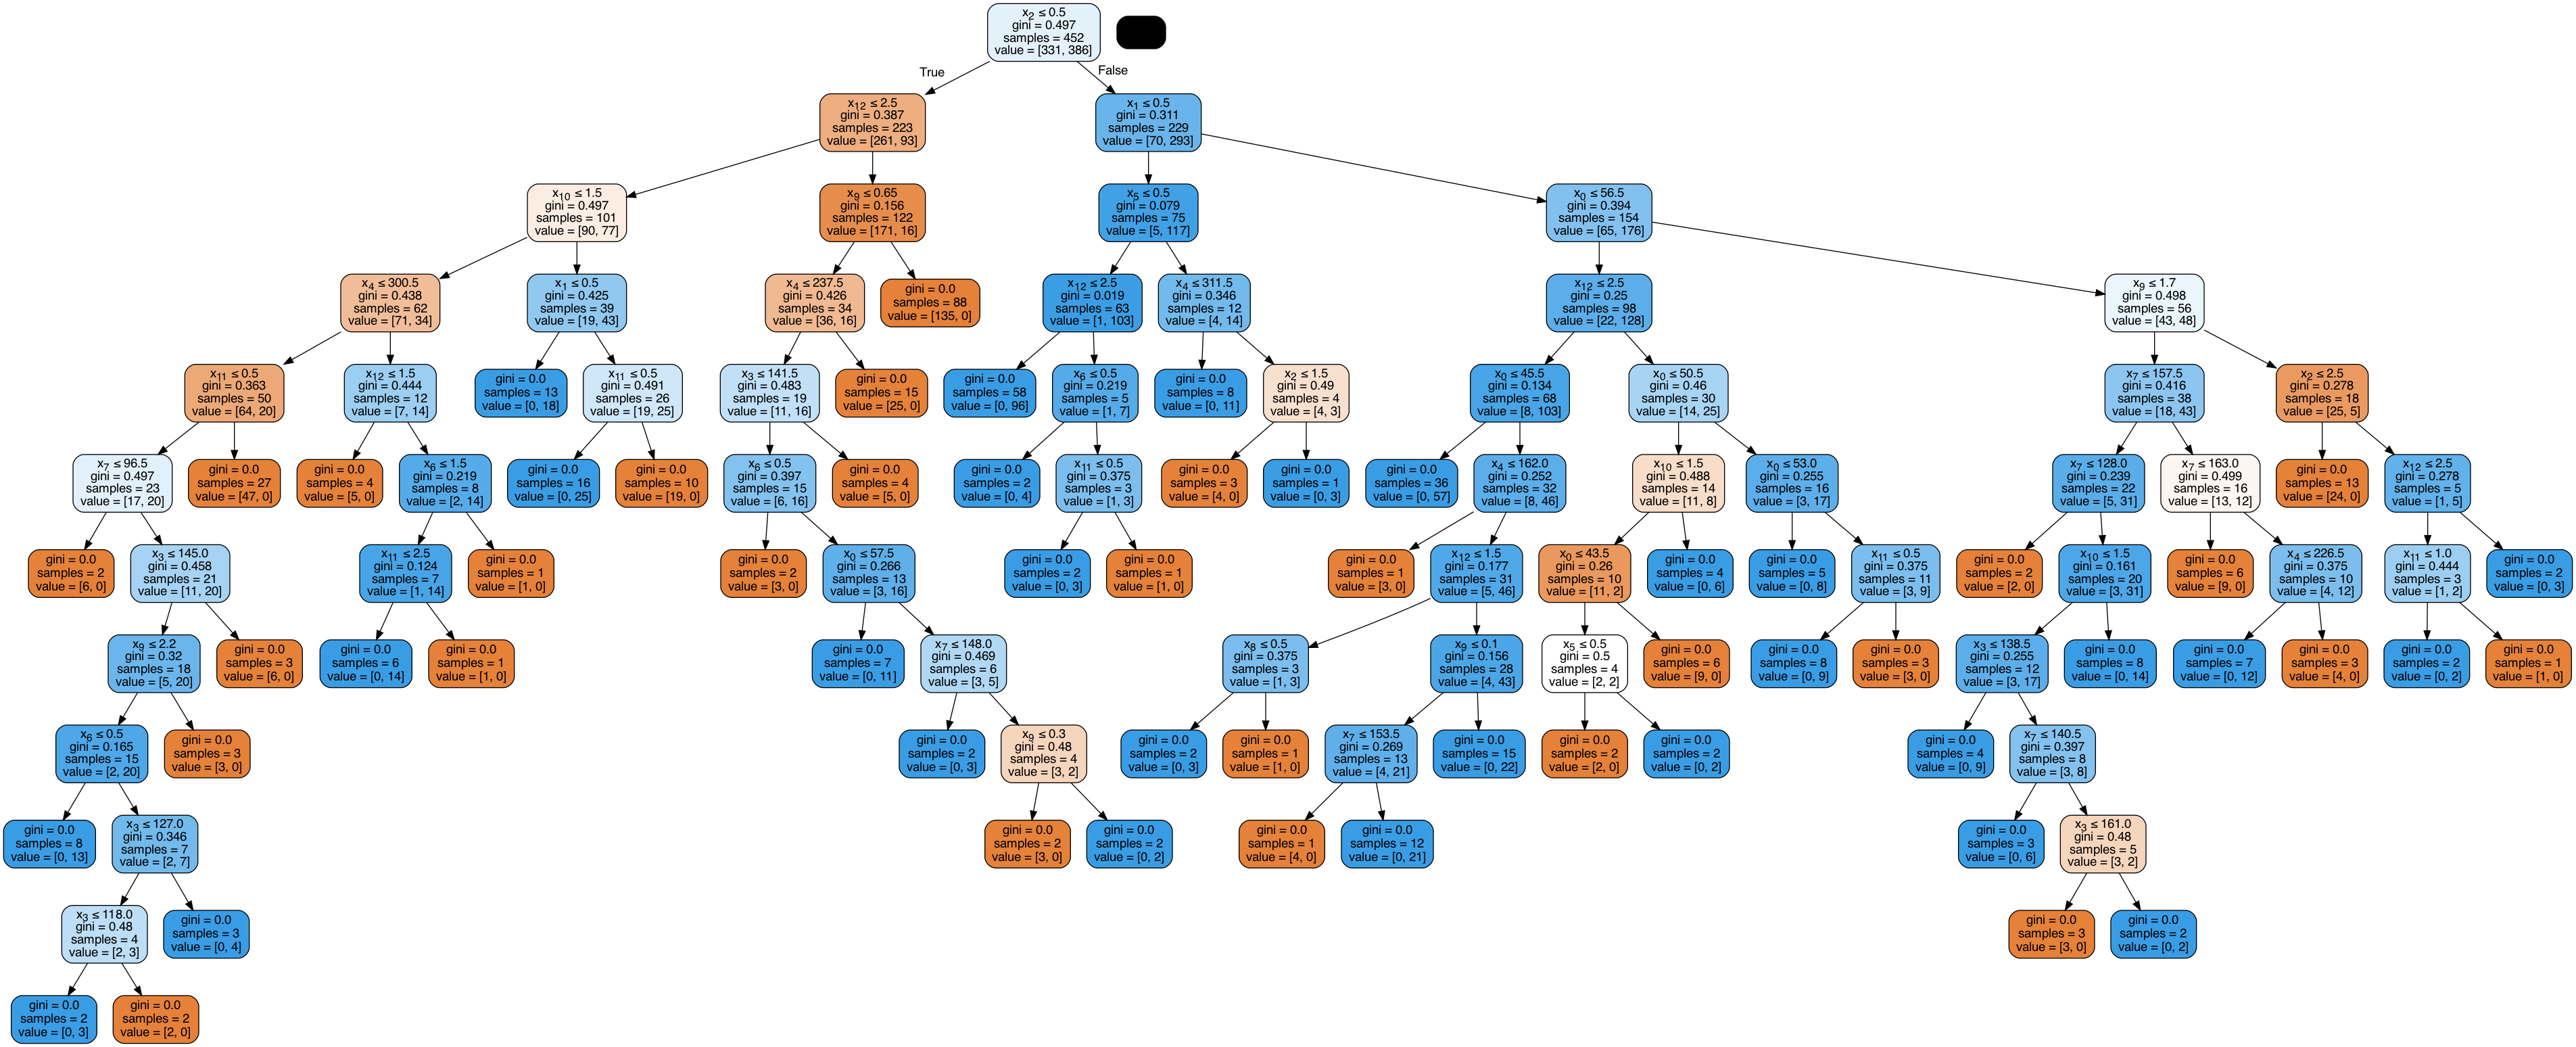

In [34]:
# Define a function to draw the decision trees in IPython
# Adapted from: http://scikit-learn.org/stable/modules/tree.html
from IPython.display import display, Image
import pydotplus

rf = RandomForestClassifier(n_estimators = 2)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,  stratify=Y, train_size=0.7)        
rf.fit(X = X_Train, y = Y_Train)
    
# Now plot the trees individually
for dtree in rf.estimators_:
    dot_data = tree.export_graphviz(dtree
                                    , out_file = None
                                    , filled   = True
                                    , rounded  = True
                                    , special_characters = True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    img = Image(graph.create_png())
    display(img)
    draw_tree(inp_tree = dtree)
    #print(dtree.tree_.feature)

In [35]:
feature_names = ["X" + str(i) for i in range(X_Train.shape[1])]
target_vals = list(np.sort(np.unique(Y_Train)))
target_names = ["y" + str(i) for i in target_vals]
print(feature_names)
# print(target_names)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12']


In [36]:
from sklearn import tree
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value     = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [37]:
for idx, dtree in enumerate(rf.estimators_):    
    get_code(tree = dtree, feature_names = feature_names, target_names = target_names)

if ( X8 <= 0.5 ) {
    if ( X7 <= 129.0 ) {
        if ( X3 <= 115.0 ) {
            return y1 ( 8 examples )
        }
        else {
            if ( X6 <= 0.5 ) {
                if ( X11 <= 0.5 ) {
                    if ( X1 <= 0.5 ) {
                        return y1 ( 2 examples )
                    }
                    else {
                        return y0 ( 5 examples )
                    }
                }
                else {
                    return y0 ( 22 examples )
                }
            }
            else {
                if ( X9 <= 1.949999988079071 ) {
                    if ( X0 <= 61.0 ) {
                        if ( X10 <= 1.5 ) {
                            return y0 ( 1 examples )
                        }
                        else {
                            return y1 ( 2 examples )
                        }
                    }
                    else {
                        if ( X6 <= 1.5 ) {
                            return y0 

In [47]:
for idx, dtree in enumerate(rf.estimators_):    
    get_code(tree = dtree, feature_names = feature_names, target_names = target_names)

if ( X8 <= 0.5 ) {
    if ( X7 <= 129.0 ) {
        if ( X3 <= 115.0 ) {
            return y1 ( 8 examples )
        }
        else {
            if ( X6 <= 0.5 ) {
                if ( X11 <= 0.5 ) {
                    if ( X1 <= 0.5 ) {
                        return y1 ( 2 examples )
                    }
                    else {
                        return y0 ( 5 examples )
                    }
                }
                else {
                    return y0 ( 22 examples )
                }
            }
            else {
                if ( X9 <= 1.949999988079071 ) {
                    if ( X0 <= 61.0 ) {
                        if ( X10 <= 1.5 ) {
                            return y0 ( 1 examples )
                        }
                        else {
                            return y1 ( 2 examples )
                        }
                    }
                    else {
                        if ( X6 <= 1.5 ) {
                            return y0 

In [56]:
def get_feature(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value     = tree.tree_.value
    return features

#     print("freature", features)

In [57]:
def indexOf(d, v):
    for i in d:
        if (i == v):
            return True
    return False    

In [59]:
d={}
for idx, dtree in enumerate(rf.estimators_): 
    a = get_feature(tree = dtree, feature_names = feature_names, target_names = target_names)
    for i in a:
        if(indexOf(d, i)):
#             lay ra munber
            number = d.get(i)
#  cong them 1 
            number = number +1;
#  Gan lai vao distionary
            d[i] = number
        else:
#       Them vào dictionary  
            d.update({i:0})
        
        
print(d)        
        

{'X8': 1, 'X7': 16, 'X3': 11, 'X11': 145, 'X6': 8, 'X1': 4, 'X9': 15, 'X0': 19, 'X10': 6, 'X2': 9, 'X12': 11, 'X4': 9, 'X5': 3}
